In [ ]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models (you'll add more later)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
train = pd.read_csv('fda_trainingset.csv')
test = pd.read_csv('fda_testset.csv')

train.shape, test.shape


((200000, 79), (46122, 78))

In [ ]:
train.head()
train.info()
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID                            200000 non-null  int64  
 1   Income index                  197888 non-null  float64
 2   income_volatility             198280 non-null  float64
 3   employment_status_flag        200000 non-null  int64  
 4   dependents_count              200000 non-null  int64  
 5   gender_flag                   200000 non-null  int64  
 6   Payment                       200000 non-null  float64
 7   collateral_flag               200000 non-null  int64  
 8   repayment_history_score       200000 non-null  int64  
 9   missed_payment_count          200000 non-null  int64  
 10  loan_tenure_years             200000 non-null  int64  
 11  monthly_savings_ratio         200000 non-null  float64
 12  avg_monthly_expenditure       200000 non-nul

,ID,Income index,income_volatility,employment_status_flag,dependents_count,gender_flag,Payment,collateral_flag,repayment_history_score,missed_payment_count,...,X70,X71,X72,X73,X74,X75,X76,X77,X78,Unnamed: 78
count,200000.000000,197888.000000,198280.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,199643.000000,199629.000000,199640.000000,199633.000000,200000.000000
mean,100000.500000,61.915575,30.571042,0.122140,0.671430,0.646270,169.672936,1.05015,509.778780,0.068945,...,0.024232,0.000819,0.014424,0.224428,0.011857,0.023750,0.006488,0.003898,0.017896,0.002625
std,57735.171256,14.405635,9.320364,0.327448,1.230516,0.478128,9.283930,0.63549,202.695377,0.306173,...,0.161629,0.024767,0.102986,0.361461,0.093719,0.131865,0.069456,0.054020,0.114710,0.051168
min,1.000000,16.000000,14.844926,0.000000,0.000000,0.000000,137.200000,0.00000,82.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.750000,53.425588,24.711360,0.000000,0.000000,0.000000,163.073382,1.00000,376.000000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100000.500000,64.000000,28.449913,0.000000,0.000000,1.000000,169.840563,1.00000,512.000000,0.000000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150000.250000,72.186607,33.555582,0.000000,1.000000,1.000000,176.368899,1.00000,657.000000,0.000000,...,0.050000,0.000000,0.000000,0.402272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,200000.000000,89.000000,67.814990,1.000000,5.000000,1.000000,195.590000,4.00000,927.000000,2.000000,...,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Rename the 'Unnamed: 78' column to 'Y'
train = train.rename(columns={'Unnamed: 78': 'Y'})

<Axes: xlabel='Y', ylabel='count'>

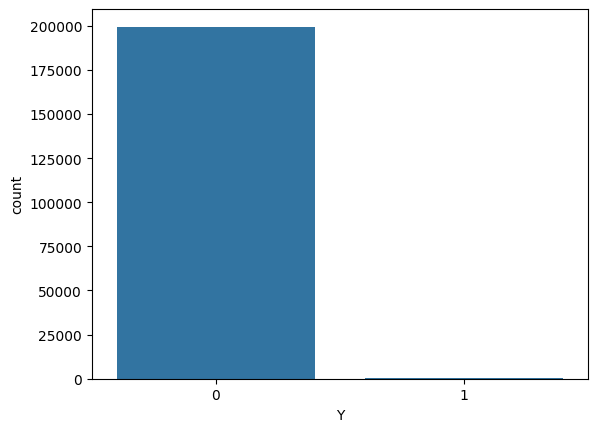

In [ ]:
train['Y'].value_counts(normalize=True)
sns.countplot(x='Y', data=train)


In [ ]:
# Check the column names in your DataFrame
print(train.columns)

Index(['ID', 'Income index', 'income_volatility', 'employment_status_flag',
       'dependents_count', 'gender_flag', 'Payment', 'collateral_flag',
       'repayment_history_score', 'missed_payment_count', 'loan_tenure_years',
       'monthly_savings_ratio', 'avg_monthly_expenditure',
       'expenditure_variability', 'total_outstanding_balance',
       'marital_status_flag', 'repayment_delay_days',
       'income_to_expense_ratio', 'social_support_flag',
       'loan_utilization_rate', 'credit_score_proxy', 'financial_stress_index',
       'max_monthly_income', 'min_monthly_income', 'nomalized_income_std_dev',
       'loan_default_probability', 'last_month_income', 'last_month_savings',
       'predicted_next_month_income', 'predicted_next_month_savings',
       'avg_quarterly_expenditure', 'financial_wellbeing_index', 'X33', 'X34',
       'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44',
       'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54',


<Axes: xlabel='Y', ylabel='count'>

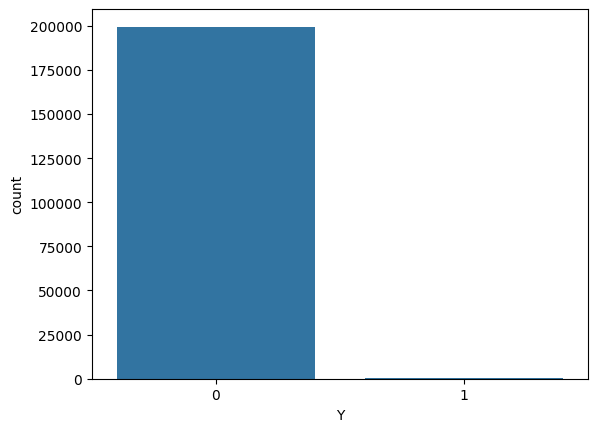

In [ ]:
train['Y'].value_counts(normalize=True)
sns.countplot(x='Y', data=train)

In [ ]:
# Check column types and missing values
train.info()
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID                            200000 non-null  int64  
 1   Income index                  197888 non-null  float64
 2   income_volatility             198280 non-null  float64
 3   employment_status_flag        200000 non-null  int64  
 4   dependents_count              200000 non-null  int64  
 5   gender_flag                   200000 non-null  int64  
 6   Payment                       200000 non-null  float64
 7   collateral_flag               200000 non-null  int64  
 8   repayment_history_score       200000 non-null  int64  
 9   missed_payment_count          200000 non-null  int64  
 10  loan_tenure_years             200000 non-null  int64  
 11  monthly_savings_ratio         200000 non-null  float64
 12  avg_monthly_expenditure       200000 non-nul

,0
ID,0
Income index,2112
income_volatility,1720
employment_status_flag,0
dependents_count,0
...,...
X75,357
X76,371
X77,360
X78,367


In [ ]:
train.head()


,ID,Income index,income_volatility,employment_status_flag,dependents_count,gender_flag,Payment,collateral_flag,repayment_history_score,missed_payment_count,...,X70,X71,X72,X73,X74,X75,X76,X77,X78,Y
0,1,87.000000,34.118411,0,2,0,165.100000,1,829,2,...,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,82.372284,31.573280,0,0,1,162.983897,1,724,0,...,0.033431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,50.000000,27.771653,0,0,1,165.100000,1,895,2,...,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,66.236109,26.515922,0,0,1,167.009549,1,637,0,...,0.039363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5,81.303299,20.843691,0,0,1,158.165419,0,564,0,...,0.069242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
# Fill numeric columns with median
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].median())


In [ ]:
train.isnull().sum()

,0
ID,0
Income index,0
income_volatility,0
employment_status_flag,0
dependents_count,0
...,...
X75,0
X76,0
X77,0
X78,0


In [ ]:
# One-hot encode categorical features
train = pd.get_dummies(train, drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Split features and target first
X = train.drop(columns='Y')
y = train['Y']

X_scaled = scaler.fit_transform(X)


In [ ]:
# Split into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Create and train the model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39895
           1       0.56      0.05      0.09       105

    accuracy                           1.00     40000
   macro avg       0.78      0.52      0.54     40000
weighted avg       1.00      1.00      1.00     40000

ROC AUC Score: 0.8594477169235911


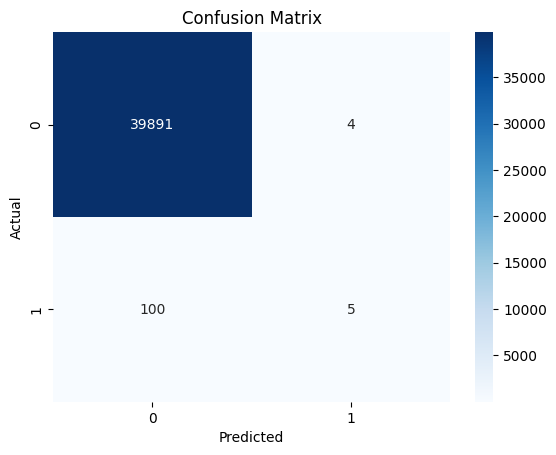

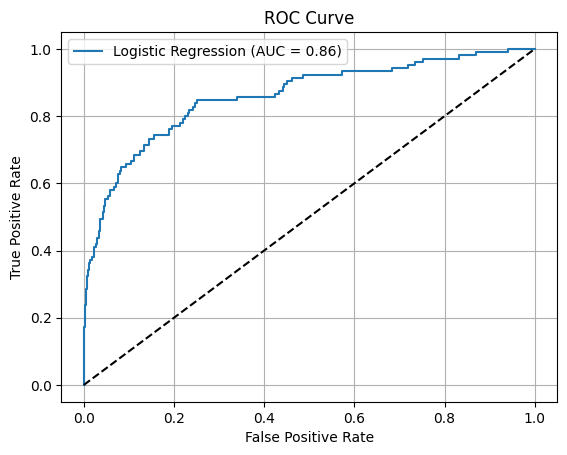

In [ ]:
# Predict classes and probabilities
y_pred = lr.predict(X_val)
y_proba = lr.predict_proba(X_val)[:, 1]

# Classification metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_proba))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_val, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Check column types and missing values
test.info()
test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46122 entries, 0 to 46121
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         46122 non-null  int64  
 1   Income index               45644 non-null  float64
 2   income_volatility          45703 non-null  float64
 3   employment_status_flag     46122 non-null  int64  
 4   dependents_count           46122 non-null  int64  
 5   gender_flag                46122 non-null  int64  
 6   Payment                    46122 non-null  float64
 7   collateral_flag            46122 non-null  int64  
 8   repayment_history_score    46122 non-null  int64  
 9   missed_payment_count       46122 non-null  int64  
 10  loan_tenure_years          46122 non-null  int64  
 11  monthly_savings_ratio      46122 non-null  float64
 12  avg_monthly_expenditure    46122 non-null  float64
 13  expenditure_variability    46122 non-null  flo

,0
ID,0
Income index,478
income_volatility,419
employment_status_flag,0
dependents_count,0
...,...
X74,0
X75,99
X76,73
X77,87


In [ ]:
# One-hot encode (align columns with training)
test_encoded = pd.get_dummies(test, drop_first=True)

# Align test set to training features
test_encoded = test_encoded.reindex(columns=X.columns, fill_value=0)

# Scale
X_test_scaled = scaler.transform(test_encoded)

In [ ]:
test_preds = lr.predict(X_test_scaled)  # for hard labels (0 or 1)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Generate IDs starting from 1
submission = pd.DataFrame({
    'ID': np.arange(1, len(test_preds) + 1),
    'Y': test_preds
})

# Save to CSV
submission.to_csv('logreg_submission.csv', index=False)



In [ ]:
submission = pd.read_csv('logreg_submission.csv')
submission.head()

In [ ]:
from google.colab import files

files.download('logreg_submission.csv')


In [ ]:
train['Y'].value_counts(normalize=True)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

# Predict as before
y_pred = lr.predict(X_val)
y_proba = lr.predict_proba(X_val)[:, 1]


In [ ]:
# Predict probabilities on test
y_proba_test = lr.predict_proba(X_test_scaled)[:, 1]

# Use a threshold of 0.3 instead of 0.5
test_preds = (y_proba_test >= 0.3).astype(int)


In [ ]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)


In [ ]:
y_val_pred = lr.predict(X_val)
y_val_proba = lr.predict_proba(X_val)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_val, y_val_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_val_proba))


In [ ]:
custom_val_pred = (y_val_proba >= 0.3).astype(int)
print(classification_report(y_val, custom_val_pred))


In [ ]:
y_test_proba = lr.predict_proba(X_test_scaled)[:, 1]
test_preds = (y_test_proba >= 0.3).astype(int)  # Tune threshold if needed


In [ ]:
submission = pd.DataFrame({
    'ID': np.arange(1, len(test_preds) + 1),
    'Y': test_preds
})

submission.to_csv('logreg_submission_v2.csv', index=False)


In [ ]:
from google.colab import files
files.download('logreg_submission_v2.csv')
